# Complex Sentiment Analysis
### UITS 2017 Survey

#### Opening data files

The needed positive and negative word lists are .csv files found in the [PresidentSentiment/data](https://github.com/cyberdh/Text-Analysis/tree/master/PresidentSentiment/data) folder. You will need to move the word lists and data files to be in the same folder as the script file, or change the script so that the file path points to the folder where the word lists and data files are located.

##### NOTE: Make sure you have read and completed the instructions in [installJupyterMacPC.ipynb](https://github.com/cyberdh/Text-Analysis/blob/master/installJupyterMacPC.ipynb)



##### Now we load the negative words

Notice that we have added words to the negative list. Feel free to change the words you want to add based on the text you are doing sentiment analysis on. If you want to remove a word from the list simply add to the script the following line: If 'yourWord' in negTokens: negTokens.remove('yourWord'). If you do not wish to add words simply put a '#' (minus the quotes) in front of the lines that add words. These would be 'negAdds =' and 'negTokens.extend(negAdds)'.

##### NOTE: If you do not want to move the data files into the same folder as the script, you will need to add the path that leads to the folder where the file is located. For example: ("~/Text-Analysis/PresidentSentiment/data/negativeUIC.csv") where it says ("negativeUIC.csv"). This will work on Karst or Mac. If you are using a PC you will need to use an absolute path: ("C:\Text-Analysis\PresidentSentiment\data\negativeUIC.csv") and make sure you use the back slash (\) instead of forward slash (/).

In [2]:
import pandas as pd
import re


negText = pd.read_csv("negativeUIC.csv")
negTokens = negText['Neg'].tolist()
#negAdds = ['whitesupremacists', 'kkk', 'whitenationalists', 'altright', 'maga', 'northkorea', 'fakenews', 'americanfacism', 'impeachtrump', 'nazi', 'nazis', 'neonazi', 'neonazis'] 
#negTokens.extend(negAdds)
if 'issue' in negTokens: negTokens.remove('issue')
if 'issues' in negTokens: negTokens.remove('issues')
if 'problem' in negTokens: negTokens.remove('problem')
if 'problems' in negTokens: negTokens.remove('problems')
if 'cloud' in negTokens: negTokens.remove('cloud')
print(negTokens[-10:])

['wrongly', 'wrought', 'yawn', 'zap', 'zapped', 'zaps', 'zealot', 'zealous', 'zealously', 'zombie']


###### Now we load the positive words

Notice that we have added words to the positive word list and removed other words from the positive word list. Simply change the words if you wish to add different words and the same with the words being removed. If you do not wish to add or remove simply put a '#' (minus the quotes) in front of the lines that add words and/or the lines that remove words.

In [3]:
posText = pd.read_csv("positiveUIC.csv")
posTokens = posText['Pos'].tolist()
#posAdds = ['theresistance']
#posTokens.extend(posAdds)
if 'work' in posTokens: posTokens.remove('work')
if 'secure' in posTokens: posTokens.remove('secure')
if 'support' in posTokens: posTokens.remove('support')
print(posTokens[-10:])

['wow', 'wowed', 'wowing', 'wows', 'yay', 'youthful', 'zeal', 'zenith', 'zest', 'zippy']


###### Here we get the tweets

In [4]:
tweetsText = pd.read_csv("Surveys/allCampusesGroups.csv")
tweetsText=tweetsText.astype(str)
tweetsText['text'] = tweetsText['text'].str.replace('[^\x00-\x7F]','')
tweetsText['text'] = tweetsText['text'].str.replace('[^\w\s]','')
tweetsTokens = tweetsText['text'].tolist()
print(tweetsTokens[:6])

['By far the biggest problems I have experienced have been related to lack of knowledge of glitches in using Canvas and Canvas in general', 'Canvas is not user friendly Most of my time with UITS is about Canvas issues but not all staff have a good understanding of the platform', 'Contacting UITS by phone has been really useful on multiple occasions I really appreciate being able to call them at any time', 'Im not positive what role UITS plays in this but the annual ballots that are sent to IUB faculty to nominate and vote for BFC members has this problem One cannot go back to modify ones votes even when one simply wants to go back and add more nominationsvotes rather than to actually change ones existing nominationsvotes', 'I always appreciate quick responses from UITS staff members in a timely manner but it may be more convenient for us if the email can be forwarded to the appropriate department when the question was submitted to a department but should be better accommodated by other

## Tokenizing the tweets

Now we will create two functions. The first for tokenizing a tweet, the second for calculating positive/negative words.

In [5]:
import re
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
    
    sum = (numPosWords - numNegWords)
    return sum

# Here is a line for testing this
# print(calculator('"RT @jmichaelkell: To sum it up:', '', '1. Trump - sexual predator', '2. Epstein - convicted pedophile', '3. Milo - pedophilia supporter', '4. Huckabee - pƒ"'))

## Analyzing tweets

Now we will use the calculator to calculate how many positive and negative tweets.
Note: that you can set a threshold for the number of words for a Tweet to be considered positive or negative.

In [6]:
# Here we set up the thresholds
posi = 0 # This means there have to be at least 1 positive word
nega = 0 # This means there has to be at least 1 negative words

# Here we prime our variables
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

# This prints out the results 
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))


Total: 1191
Positive: 667
Neutral: 264
Negative: 260


#### Gathering positive tweets

This will gather all examples of positive tweets.

In [7]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi and numPosTweets < numberWanted:
        numPosTweets += 1
        posiTweetList.append(tweet)

print(posiTweetList)

['Canvas is not user friendly Most of my time with UITS is about Canvas issues but not all staff have a good understanding of the platform', 'Contacting UITS by phone has been really useful on multiple occasions I really appreciate being able to call them at any time', 'I always appreciate quick responses from UITS staff members in a timely manner but it may be more convenient for us if the email can be forwarded to the appropriate department when the question was submitted to a department but should be better accommodated by other department', 'One thing the survey reminded me ofI find the telephone system very difficult to use I would like it to be a good deal easier to transfer people and Id really like to be able to pick up other phones in my area from my desk phone']


#### Gathering negative tweets

This will gather examples of negative tweets.

In [8]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc < nega and numNegTweets < numberWanted:
        numNegTweets += 1
        negaTweetList.append(tweet)

print(negaTweetList)

['By far the biggest problems I have experienced have been related to lack of knowledge of glitches in using Canvas and Canvas in general', 'By far my biggest complaint is the amount of time the Exchange server is inoperable I literally run my day and manage my tasks using Outlook to such an extent that server downtime is DOWN time for me Not being able to depend on Outlook is highly problematic', 'Finally I find it annoying that in OneIU when I click on a program icon I am taken to a description of that program rather than to the program itself Often the link for where to accessbegin the actual program is not obvious so Im stuck looking at informational data I dont need to use a program that I cannot find Once Ive accessed a program once could the system route me directly to it or its login screen rather than to the information page', 'I wish students would use you more instead of asking me for help Its actually really shocking to me how little students know about computers I know I k

#### Testing a tweet

Here you can take a tweet and test it to see how many positive or negative words it has.

In [9]:
tweetToCalc = input("What is the tweet to calculate? ")
print(calculator(tweetToCalc))

What is the tweet to calculate? By far the biggest problems I have experienced have been related to lack of knowledge of glitches in using Canvas and Canvas in general
-2


#### Gathering and plotting positive and negative words

This will gather the words that are positive in the tweets and tabulate them.

In [10]:
import re
posWordsList = []
negWordsList = []

def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def wordsCalculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)

tweet2Process = input("What tweet do you want to process? ")
wordsCalculator(tweet2Process)
print("Positive words: " + str(posWordsList[:10]))
print("Negative words: " + str(negWordsList[:10]))

What tweet do you want to process? By far the biggest problems I have experienced have been related to lack of knowledge of glitches in using Canvas and Canvas in general
Positive words: []
Negative words: ['lack', 'glitches']


## Gathering and plotting all positive and negative words

In [11]:
import re

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
posWordsList = []
negWordsList = []
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

def wordsGathering(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)       
    
    sum = (numPosWords - numNegWords)
    return sum

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = wordsGathering(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 1988
Negative words: 972


###### Positive words

   helpful       like      great       good       well   positive     better   friendly appreciate  available 
       192        146         87         77         72         69         53         45         39         39 
           word  freq
11      helpful   192
12         like   146
15        great    87
1          good    77
19         well    72
4      positive    69
8        better    53
0      friendly    45
3    appreciate    39
22    available    39
10         nice    38
36       helped    37
23       worked    31
14         love    28
56         best    23
13       easier    23
128   satisfied    22
99         easy    21
21       enough    20
41      patient    20
73        happy    20
81        works    20
5        timely    19
85        thank    19
2        useful    18


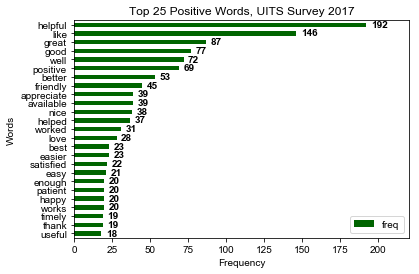

In [12]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posit = Counter(posDist)
positdf = pd.DataFrame.from_dict(posit, orient='index').reset_index()
positdf = positdf.rename(columns={'index':'word', 0:'freq'})
positdf = positdf.sort_values('freq', ascending = False)
posdf = positdf[:25]
print(posdf)

fig = posdf.plot(x= posdf['word'],kind='barh', align='center', color =['darkgreen'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Positive Words, UITS Survey 2017')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,220)

for i, v in enumerate(posdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig('allPosWords.png', format='png', dpi=300, bbox_inches='tight',)

plt.show()


###### Negative words

  difficult        slow frustrating        hard    negative     trouble    annoying      unable     concern        lack 
         46          42          37          24          23          20          18          17          15          14 
            word  freq
10     difficult    46
53          slow    42
19   frustrating    37
94          hard    24
23      negative    23
46       trouble    20
8       annoying    18
17        unable    17
131      concern    15
0           lack    14
30      terrible    14
22      concerns    13
71          dead    11
5      complaint    11
43   frustration    10
36          hate    10
2        limited     9
65   complicated     9
114   frustrated     9
69          miss     8
20     confusing     8
194   impossible     8
129         pain     8
85    complaints     7
55           bad     7


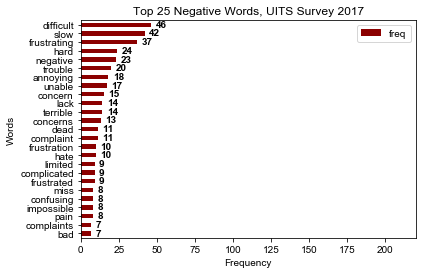

In [13]:
import nltk, matplotlib

negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
nega = Counter(negDist)
negadf = pd.DataFrame.from_dict(nega, orient='index').reset_index()
negadf = negadf.rename(columns={'index':'word', 0:'freq'})
negadf = negadf.sort_values('freq', ascending = False)
negdf = negadf[:25]
print(negdf)
#font = {'fontname':'Ariel'}

fig = negdf.plot(x= negdf['word'],kind='barh', align='center', color =['darkred'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Negative Words, UITS Survey 2017')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,220)

for i, v in enumerate(negdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig('allNegWords.png', format='png', dpi=300, bbox_inches='tight',)
plt.show()